# PROJET 10: Détectez des faux billets avec R ou Python

# Sommaire

- [1- Import des librairies nécessaires et du fichier de données](#1---Import-des-librairies-nécessaires-et-du-fichier-de-données)
- [2 - Création de fonctions](#2---Création-de-fonctions)
- [3 - Exploration des données](#3---Exploration-des-données)
- [4 - Regression linéaire](#4---Regression-linéaire)
  * [4.1 Evaluation du modèle de regression linéaire](#4.1---Evaluation-du-modèle-de-regression-linéaire)
      * [4.1.1 - Analyse de la multicolinéarité](#4.1.1---Analyse-de-la-multicolinéarité)
      * [4.1.2 - Linéarité des relations entre la réponse et les variables prédictives](#4.1.2---Linéarité-des-relations-entre-la-réponse-et-les-variables-prédictives)
      * [4.1.3 - Normalité des résidus](#4.1.3---Normalité-des-résidus)
      * [4.1.4 - Homoscédasticité](#4.1.4---Homoscédasticité)
  * [4.2 - Imputation des valeurs manquantes](#4.2---Imputation-des-valeurs-manquantes)
- [5 - Analyse descriptive des billets](#5---Analyse-descriptive-des-billets)
  * [5.1 - Statistiques descriptives](#5.1---Statistiques-descriptives)
  * [5.2 - Distribution des billets en fonction de leur nature](#5.2---Distribution-des-billets-en-fonction-de-leur-nature)
  * [5.3 - Distribution des dimensions des billets](#5.3---Distribution-des-dimensions-des-billets)
  * [5.4 - Matrice de correlation des variables](#5.4---Matrice-de-correlation-des-variables)
  * [5.5 - Test ANOVA ](#5.5---Test-ANOVA )
- [6 - Algorithme de reconnaissance des faux billets](#6---Algorithme-de-reconnaissance-des-faux-billets)
  * [6.1 - Kmeans](#6.1---Kmeans)
      * [6.1.1 - Evaluation du modèle Kmeans](#6.1.1---Evaluation-du-modèle-Kmeans)
      * [6.1.2 - Application du modèle Kmeans aux données test](#6.1.2---Application-du-modèle-Kmeans-aux-données-test)
      * [6.1.3 - Sauvegarde du modèle de Kmeans](#6.1.3---Sauvegarde-du-modèle-de-Kmeans)
  * [6.2 - Régression logistique](#6.2---Régression-logistique)
      * [6.2.1 - Régression Logistique avec la librairie Statsmodels](#6.2.1---Régression-Logistique-avec-la-librairie-Statsmodels)
      * [6.2.2 - Régression Logistique avec la librairie Sklearn](#6.2.2---Régression-Logistique-avec-la-librairie-Sklearn)
          * [a - Séparation du datasframe en données d'entrainement et données de test](#a---Séparation-du-datasframe-en-données-d'entrainement-et-données-de-test)
          * [b - Evaluation du modèle de regression logistique](#b---Evaluation-du-modèle-de-regression-logistique)
          * [c - Application du modèle aux données test](#c---Application-du-modèle-aux-données-test)
          * [d - Sauvegarde du modele de régression logistique](#d---Sauvegarde-du-modele-de-régression-logistique)
- [7 -  Algorithme de detection des faux billets](#7---Algorithme-de-detection-des-faux-billets)
    * [7.1 - Algorithme de détection des faux billets avec le modèle de régression logistique](#7.1---Algorithme-de-détection-des-faux-billets-avec-le-modèle-de-régression-logistique)
    * [7.2 - Algorithme de détection des faux billets avec le modèle Kmeans ](#7.2---Algorithme-de-détection-des-faux-billets-avec-le-modèle-Kmeans )

 **Objectif du projet**: 

- Créer un algorithme de machine learning qui soit capable de différencier automatiquement les vrais des faux billets à partir des caractéristiques géométriques de ces billets. 

- Pour y parvenir nous allons utiliser deux méthode de classification: **la régression logistique et le K mean**;
- **Une régression linéaire** sera nécessaire pour le traitement des données manquantes


# 1 - Import des librairies nécessaires et du fichier de données

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import Image, display
import scipy.stats as st
from scipy.stats import  ks_2samp
from scipy.stats import skew, kurtosis
from statsmodels.api import Logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import normal_ad, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import  LogisticRegression
from sklearn import metrics, decomposition
from sklearn.metrics import  roc_curve, accuracy_score , precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import joblib
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

In [2]:
billets = pd.read_csv(r"C:\Users\imadk\Downloads\billets.csv", sep=';')
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


# 2 - Création de fonctions

In [3]:
from IPython.display import Image, display
import plotly.figure_factory as ff
import numpy as np
from scipy.stats import skew, kurtosis, ks_2samp

def analyse_univarie(df, col, alpha):
    print(col.capitalize())
    hist_data = [df[col]]
    group_labels = [col]  # name of the dataset
    fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
    fig.add_vline(x=df[col].mean(), line_width=6, line_dash="dash", line_color="green")
    fig.add_vline(x=df[col].median(), line_width=3, line_dash="dash", line_color="red")
    fig.update_layout(template='plotly_dark', height=700, width=900)
    
    # Enregistrer l'image
    fig.write_image(f"figure/{col}_figure.png")
    
    # Afficher l'image
    display(Image(filename=f"figure/{col}_figure.png"))

    print("--------------")
    print("Caractéristiques de forme")
    print("--------------")
    print("Coefficient d'asymétrie Skewness : ", skew(df[col]))
    print("Coefficient d'aplatissement Kurtosis : ", kurtosis(df[col]))
    print("--------------")
    print("Test de normalité")
    print("--------------") 
    statistic, pvalue = ks_2samp(df[col], list(np.random.normal(np.mean(df[col]), np.std(df[col]), 1000)))
    print("Statistiques de test Kolmogorov-Smirnov : ", round(statistic, 3))
    print("p-value du test Kolmogorov-Smirnov : ", pvalue)

    if pvalue <= alpha:
        print("l'échantillon ne se comporte pas comme une loi normale (l'hypothèse H0 est rejetée)")
    else:
        print("l'échantillon se comporte comme une loi normale  (l'hypothèse H0 est acceptée)")
    
    print("--------------\n")


    
# test ANOVA
def test_ANOVA(df, col_quali, col_quanti, alpha) :       
    valeurs = df[col_quali].unique()

    listes = []
    for i in range(len(valeurs)):
        listes.append(df[df[col_quali] == valeurs[i]][col_quanti])

    fvalue, pvalue = st.f_oneway(*listes)

    print("Résultat test ANOVA")
    print("------------------")
    print("p-value : ", pvalue)
    print("FSTAT : ", fvalue)
    print("------------------")
    if pvalue <= alpha:
        print("On rejette H0.\nLes vrais billets n'ont pas la même moyenne que les faux  billets pour la variable x= {} à un niveau de confiance de 95%.".format(col_quanti))
    else:
         print("On ne rejette pas H0: Les moyennes sont identiques pour la variable x= {} à un niveau de confiance de 95%.".format(col_quanti))


# 3 - Exploration des données

## Variables

**is_genuine** : la nature du billet: (boolean) True pour un vrai billet et False pour un faux billet;

**length** : la longueur du billet (en mm) ;

**height_left** : la hauteur du billet (mesurée sur le côté gauche, en mm) ;

**height_right** : la hauteur du billet (mesurée sur le côté droit, en mm) ;

**margin_up** : la marge entre le bord supérieur du billet et l'image du billet (en mm) ;

**margin_low** : la marge entre le bord inférieur du billet et l'image du billet (en mm) ;

**diagonal** : la diagonale du billet (en mm).

In [4]:
billets.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

- Nous avons **37 valeurs manquantes** sur la variable **margin_low** 
- Puisque notre jeu de données et de petite taille ca sera une mauvaise idée de les supprimé.

In [5]:
# Générer des statistiques descriptives
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [6]:
# Générer les informations sur la dataframe
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


- Il est important d’identifier les données manquantes dans un jeu de données avant d’appliquer un algorithme de Machine Learning (ML). 
- En effet, beaucoup de ces derniers reposent sur des méthodes statistiques qui supposent recevoir un jeu de données complet en entrée.
- L’imputation de données manquantes réfère au fait qu’on remplace les valeurs manquantes dans le jeu de données par des valeurs artificielles. 
- Idéalement, ces remplacements ne doivent pas conduire à une altération sensible de la distribution et la composition du jeu de données. dans notre cas on va faire une imputation par regression linéaire

# 4 - Regression linéaire

- On va estimer un modèle de régression avec plusieurs variables explicatives et la variable dépendante qui est celle qui contient les valeurs manquantes **margin_low**.  
- On va calculer un modèle prédictif avec comme variable à prédire **margin_low**. 
- Ensuite on applique ce modèle pour estime les différentes valeurs manquantes de **margin_low**.

In [7]:
# Suppression des données manquantes :
billets_without_nan = billets.dropna()
billets_without_nan

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [8]:
#Création d'un dataset comprenant les valeurs manquantes sur la variable margin_low
billets_with_nan= billets[billets.isnull().any(axis=1)]
billets_with_nan

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


- Ensuite on utilise statsmodel car il nous permet d'avoir un resumé des statistiques de notre regression multiple sous forme d'un tableau, ce que nous n'avons pas avec sklearn
- La régression OLS (moindres carrés ordinaires) est une technique pour estimer les coefficients d'une régression linéaire qui décrivent les relations entre une ou plusieurs variables quantitatives et une variable dépendante (selon si la régression linéaire est simple ou multiple)

In [9]:
# créez un modele a partir 
reg_multiple = smf.ols(formula='margin_low~diagonal+height_left+height_right+margin_up+length', data=billets_without_nan)
# Ajustement complet du modèle
reg_multiple = reg_multiple.fit()

# Visualisation des résultats
print(reg_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          2.60e-202
Time:                        17:14:42   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

**Interpretation des résultats**

**Le R² ajusté est égal à 0.47**,c’est le pourcentage de variation de la variable dépendante qui est expliqué par un modèle linéaire corrigé par le nombre de degrè de liberté. Mais il ne permet pas de savoir si le modèle est statistiquement significatif, c'est ici qu'intervient le test de significativité glogale de Fisher.

**Test de significativité globale**

**F-statistique et p-value:** La statistique F (266.1) et la valeur de p correspondante ( 2.60e-202) nous indiquent la signification globale du modèle de régression, c’est-à-dire si les variables prédictives du modèle sont utiles pour expliquer la variation de la variable de réponse. Étant donné que la valeur de p ici est inférieure à 0,05 notre modèle est statistiquement significatif

**P(>|t|):** Il s’agit de la valeur de p associée aux coefficients du modèle. Puisque la valeur p pour les variables (0,000) est inférieure à 0,05 nous pouvons dire qu’il existe une association statistiquement significative

**Skewness et Kurtosis** parlent de la distribution des données. L’asymétrie skewness et le kurtosis pour la distribution normale sont respectivement 0,482 et 3,801

## 4.1 - Evaluation du modèle de regression linéaire multiple

La régression linéaire multiple (RLM) est une généralisation de la régression linéaire simple, dans le sens où cette approche permet de mettre en relation une variable réponse (variable dépendante), de type numérique continu, avec plusieurs variables explicatives (ou indépendantes), de type numérique continu, ou catégorielle par l’intermédiaire d’une fonction linéaire dans ses paramètres (addition de paramètres).

Conditions d’application

Quatre conditions doivent être respectées :

- Linéarité des relations entre la réponse et les variables prédictives (utilisation d’une transformation si besoin)
- Normalité des résidus
- Homoscédasticité des résidus
- Absence de multicollinéarité (forte corrélation linéaire) entre les variables prédictives.

In [10]:
# La moyenne des residus :
resid_mean=reg_multiple.resid.mean()
resid_mean

-7.231702895056659e-15

### 4.1.1 - Analyse de la multicolinéarité

- Pour détecter la multicolinéarité on va utiliser une mesure connue sous le nom de facteur d’inflation de la variance (VIF), qui mesure la corrélation et la force de la corrélation entre les variables explicatives dans un modèle de régression.
- Une valeur de 1 indique qu’il n’y a pas de corrélation entre une variable explicative donnée et toute autre variable explicative dans le modèle.
- Une valeur comprise entre 1 et 5 indique une corrélation modérée entre une variable explicative donnée et d’autres variables explicatives du modèle, mais cela n’est souvent pas assez grave pour nécessiter une attention particulière.
- Une valeur supérieure à 5 indique une corrélation potentiellement grave entre une variable explicative donnée et d’autres variables explicatives du modèle. Dans ce cas, les estimations des coefficients et les valeurs p dans la sortie de régression ne sont probablement pas fiables.

In [11]:
var_infla_fact = pd.Series([variance_inflation_factor(reg_multiple.model.exog, i) for i in np.arange(1, reg_multiple.model.exog.shape[1])], 
                           index= billets_without_nan[["diagonal","height_left","height_right", "margin_up", "length"]].columns)
print("--------------")
print("Résultats du facteur d'inflation de la variance:")
print(var_infla_fact)
print("--------------")
print("facteur d'inflation de la variance moyen:",var_infla_fact.mean())
print("--------------")


--------------
Résultats du facteur d'inflation de la variance:
diagonal        1.013613
height_left     1.138261
height_right    1.230115
margin_up       1.404404
length          1.576950
dtype: float64
--------------
facteur d'inflation de la variance moyen: 1.2726683823567724
--------------


- Etant donner que tout les coefficient sont comprrise entre 1 et 5 et plutot proche de 1 indique une corrélation trés trés faible ce qui n'est pas assez grave 

### 4.1.2 - Linéarité des relations entre la réponse et les variables prédictives

In [12]:
# résidu et prédiction des valeurs 
valeurs_predict = reg_multiple.predict()
residus = reg_multiple.resid
residus

0      -0.268676
1      -0.368908
2       0.274067
3      -0.536580
4      -0.537425
          ...   
1495   -0.771741
1496   -0.186887
1497    0.609723
1498    0.361426
1499   -0.209032
Length: 1463, dtype: float64

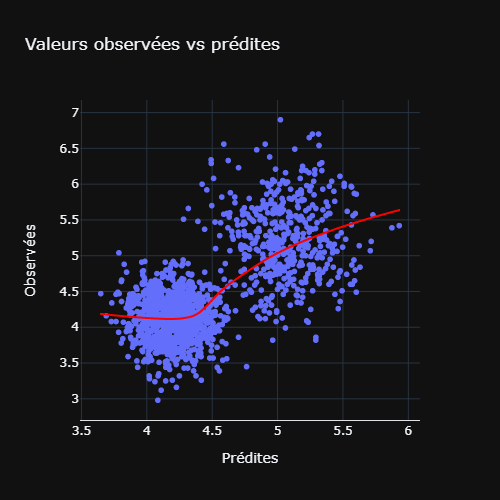

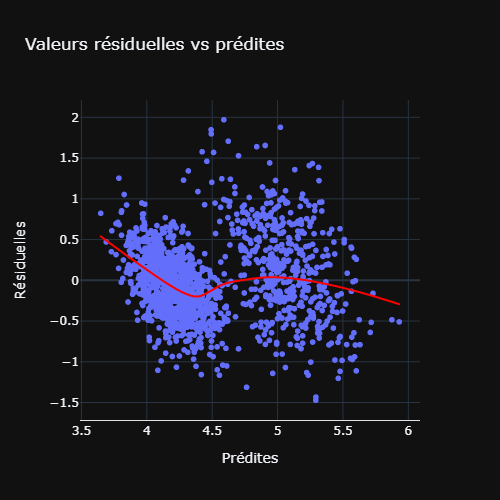

In [13]:
fig = px.scatter(
                x= valeurs_predict,
                y=billets_without_nan["margin_low"], 
                trendline="lowess",
                trendline_color_override="red",
                title = 'Valeurs observées vs prédites')
                
fig.update_layout(template = 'plotly_dark', height=500, width=500)
fig.update_yaxes(showticklabels = True, title_text = 'Observées')
fig.update_xaxes(nticks=12, title_text = 'Prédites',
                            showline=True, linewidth=1,linecolor='#E0E2E5')
fig.write_image("figure/2.png")
display(Image(filename="figure/2.png"))

fig = px.scatter(
                x=valeurs_predict, 
                y=residus,
                trendline="lowess",
                trendline_color_override="red",
                title = 'Valeurs résiduelles vs prédites')
                
fig.update_layout(template = 'plotly_dark', height=500, width=500)
fig.update_yaxes(showticklabels = True, title_text = 'Résiduelles')
fig.update_xaxes(nticks=12, title_text = 'Prédites',
                            showline=True, linewidth=1,linecolor='#E0E2E5')
fig.write_image("figure/3.png")
display(Image(filename="figure/3.png"))

- La relation n'est pas linéaire, l'hypothèse de linéarité n'est pas vérifiée. 

- Solutions potentielles :

    - Transformation non-linéaire sur les variables dépendantes/indépendantes.

    - Ajout d'une feature, transformation de features préexistantes (mise au carré par exemple).

    - Ajout de features non considérées précédemment.

### 4.1.3. Normalité des résidus

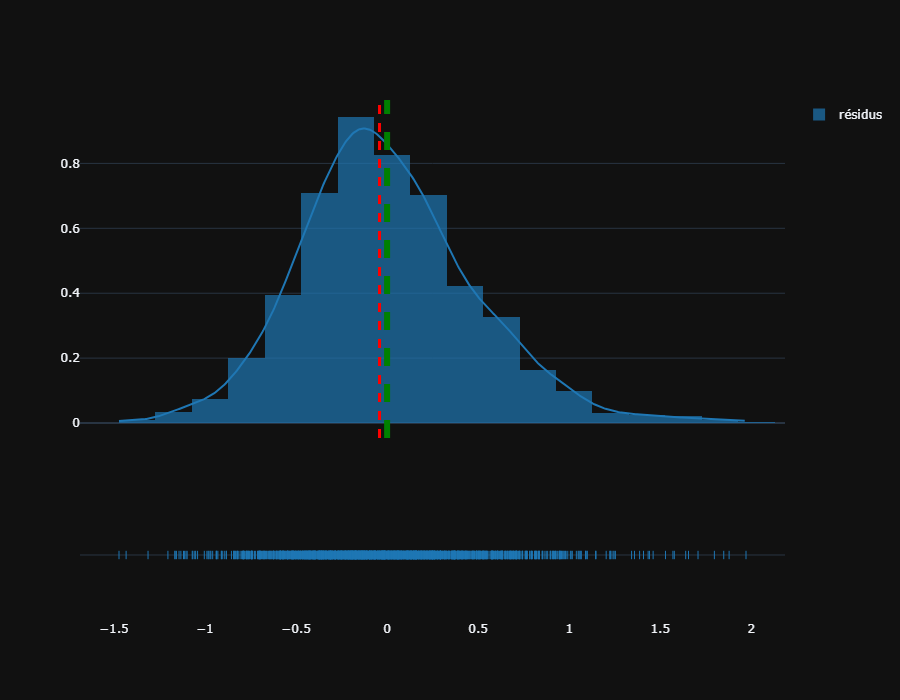

--------------
Caractéristiques de forme
--------------
Coefficient d'asymétrie Skewness :  0.48225241497105115
Coefficient d'aplatissement Kurtosis :  0.8014424699465681
--------------
Test de normalité
--------------
p-value du test d'anderson darling:  5.114137678791534e-12
Statistiques du test Anderson Darling. :  4.855
l'échantillon ne se comporte pas comme une loi normale (l'hypothèse H0 est rejetée)


In [14]:
hist_data = [residus]
group_labels = ['résidus'] # name of the dataset
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.add_vline(x=residus.mean(), line_width=6, line_dash="dash", line_color="green")
fig.add_vline(x=residus.median(), line_width=3, line_dash="dash", line_color="red")
fig.update_layout(template = 'plotly_dark', height=700, width=900)
fig.write_image("figure/4.png")
display(Image(filename="figure/4.png"))
print("--------------")
print("Caractéristiques de forme")
print("--------------")
print("Coefficient d'asymétrie Skewness : ", skew(residus))
print("Coefficient d'aplatissement Kurtosis : ", kurtosis(residus))
print("--------------")
print("Test de normalité")
print("--------------") 
ad2, pval=normal_ad(residus)
print("p-value du test d'anderson darling: ",pval)
print("Statistiques du test Anderson Darling. : ",round(ad2, 3))
if pval <= 0.05:
    print("l'échantillon ne se comporte pas comme une loi normale (l'hypothèse H0 est rejetée)")
else:
    print("l'échantillon se comporte comme une loi normale  (l'hypothèse H0 est acceptée)")

- Un skewness empirique, qui est la mesure de l'asymétrie, supérieur à 0 indique un étalement à droite comme c'est le cas ici.
- p< 0,05 les résidus ne se comporte pas comme une loi normale

### 4.1.4. Homoscédasticité

- L'homoscédasticité est la constance de la variance des résidus. 
- elle désigne le caractère d'une liaison entre deux variables lorsque la variance de Y est la même pour toutes les valeurs de X et réciproquement. 
- Cette condition doit être remplie pour que toutes les prévisions faites sur Y à partir de X (ou sur X à partir de Y) aient le même degré de précision.
- En statistiques, le test de Breusch-Pagan permet de tester l'hypothèse d'homoscédasticité du terme d'erreur d'un modèle de régression linéaire.

In [15]:
# Homoscedasticite:
breuschpagan_Test = het_breuschpagan(residus, reg_multiple.model.exog)
Labels_breuschpagan_Test = ["Test Statistic", "p-value", "F-Statistic", "F-Test p-value"]
print("--------------")
print("Résultat du test")
print("--------------")
print(dict(zip(Labels_breuschpagan_Test,breuschpagan_Test)))
print("--------------")
print("p-Value du breuschpagan:", breuschpagan_Test[1])
if breuschpagan_Test[1] > 0.05:
    print("Résultat du test breuschpagan à 5% de signficance: homoscédastique")
else:
    print("Résultat du test breuschpagan à 5% de signficance: hétéroscédastique")
print("--------------")    

--------------
Résultat du test
--------------
{'Test Statistic': 80.1626128017551, 'p-value': 7.7595352161779375e-16, 'F-Statistic': 16.8923588461545, 'F-Test p-value': 2.9227496566149227e-16}
--------------
p-Value du breuschpagan: 7.7595352161779375e-16
Résultat du test breuschpagan à 5% de signficance: hétéroscédastique
--------------


- H0 (hypothèse nulle) : homoscédasticité 
- H1 (hypothèse alternative) : hétéroscédasticité
- La P-value est inférieure à 5% nous pousse à rejeter l'hypothèse nulle d'homoscédasticité.

Bien que les hypothèses du modèle linéaire ne soient pas respectées, Un modèle linéaire est robuste. Donc on va utiliser le modele lineaire pour prédire les valeurs de margin_low

## 4.2 - Imputation des valeurs manquantes

Nous allons faire une prediction des valeurs manquantes sur la variable margin_low à partie des résultats de la regression linéaire

In [16]:
x_data = billets_with_nan[["diagonal", "height_left", "height_right", "margin_up", "length"]]
y_predict = reg_multiple.predict(x_data)
y_predict

72      4.318525
99      4.393668
151     4.410457
197     4.319014
241     4.650617
251     3.803308
284     4.179736
334     4.127442
410     4.135034
413     4.160539
445     4.177420
481     3.768554
505     4.058764
611     4.298047
654     4.160607
675     4.094065
710     4.439846
739     4.470650
742     4.341643
780     4.080414
798     3.614306
844     4.371811
845     4.093621
871     4.249629
895     3.893748
919     3.746333
945     4.237415
946     4.710533
981     4.137780
1076    5.050277
1121    4.802145
1176    5.067584
1303    5.047570
1315    4.778967
1347    5.726993
1435    5.185862
1438    5.140043
dtype: float64

In [17]:
# Association des valeurs de "y_predict" à la variable "margin_low" du "Df_NaN"
billets_with_nan= billets_with_nan.assign(margin_low = y_predict)
#Visualisation du "billets_with_nan"
billets_with_nan

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.318525,3.25,112.79
99,True,171.93,104.07,104.18,4.393668,3.14,113.08
151,True,172.07,103.80,104.38,4.410457,3.02,112.93
197,True,171.45,103.66,103.80,4.319014,3.62,113.27
241,True,171.83,104.14,104.06,4.650617,3.02,112.36
251,True,171.80,103.26,102.82,3.803308,2.95,113.22
284,True,171.92,103.83,103.76,4.179736,3.23,113.29
334,True,171.85,103.70,103.96,4.127442,3.00,113.36
410,True,172.56,103.72,103.51,4.135034,3.12,112.95
413,True,172.30,103.66,103.50,4.160539,3.16,112.95


In [18]:
data_final = pd.concat([billets_with_nan, billets_without_nan])
data_final

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.318525,3.25,112.79
99,True,171.93,104.07,104.18,4.393668,3.14,113.08
151,True,172.07,103.80,104.38,4.410457,3.02,112.93
197,True,171.45,103.66,103.80,4.319014,3.62,113.27
241,True,171.83,104.14,104.06,4.650617,3.02,112.36
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.420000,3.09,111.28
1496,False,172.19,104.63,104.44,5.270000,3.37,110.97
1497,False,171.80,104.01,104.12,5.510000,3.36,111.95
1498,False,172.06,104.28,104.06,5.170000,3.46,112.25


In [19]:
# Vérification des valeurs nuls dans notre nouvelle dataset
data_final.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Notre fichier n'a plus de valeurs manquantes

# 5 - Analyse descriptive des billets

## 5.1 - Statistiques descriptives

In [20]:
data_final.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.483475,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.659632,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.020000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


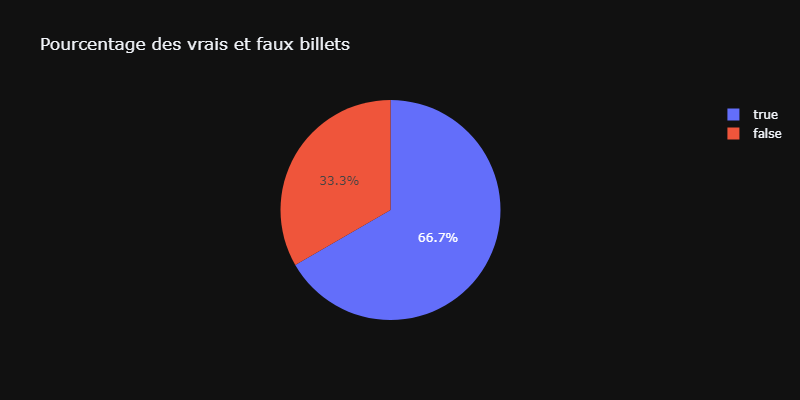

In [21]:
# Graphiques représentant le taux des vrais et faux billets
fig = px.pie(data_final,names = 'is_genuine', color= 'is_genuine',title = "Pourcentage des vrais et faux billets", width=800, height=400)
fig.update_layout(template = 'plotly_dark')
fig.write_image("figure/5.png")
display(Image(filename="figure/5.png"))

- On a 66,33% des vrais billets et 33,3% de faux billets

## 5.2 - Distribution des billets en fonction de leur nature

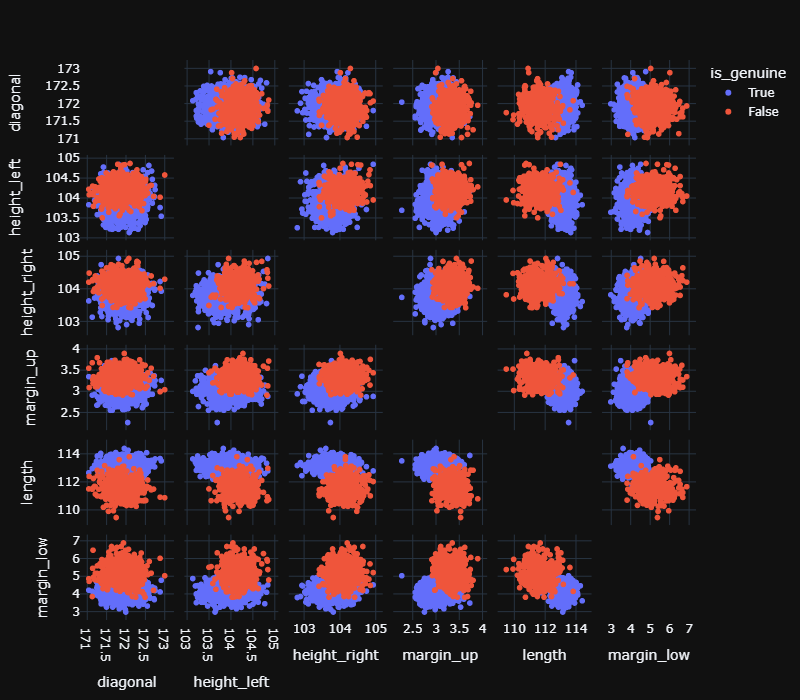

In [22]:
fig = px.scatter_matrix(data_final, dimensions=['diagonal','height_left','height_right','margin_up','length','margin_low'], color=data_final['is_genuine'])
fig.update_traces(diagonal_visible=False)
fig.update_layout(template = 'plotly_dark', width=800, height= 700)
fig.write_image("figure/6.png")
display(Image(filename="figure/6.png"))

- En regardant les densité et les nuages de points, on voit que les variables qui différencient le mieux les valeurs vrai ou faux sont margin_low et length

## 5.3 - Distribution des dimensions des billets

Diagonal


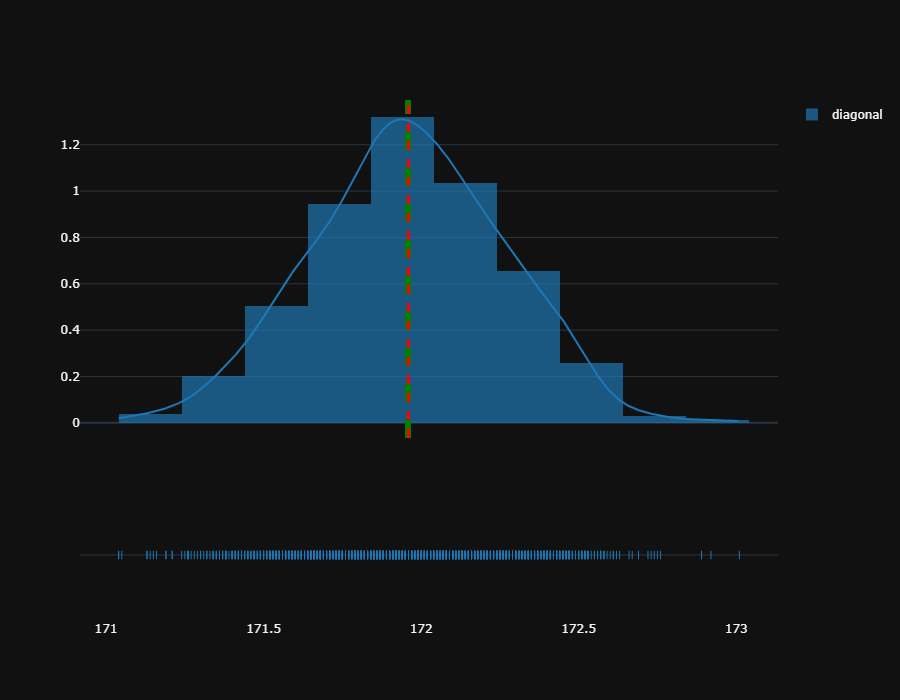

--------------
Caractéristiques de forme
--------------
Coefficient d'asymétrie Skewness :  -0.0332733856260955
Coefficient d'aplatissement Kurtosis :  -0.12886436386674305
--------------
Test de normalité
--------------
Statistiques de test Kolmogorov-Smirnov :  0.041
p-value du test Kolmogorov-Smirnov :  0.26047095675335685
l'échantillon se comporte comme une loi normale  (l'hypothèse H0 est acceptée)
--------------

Height_left


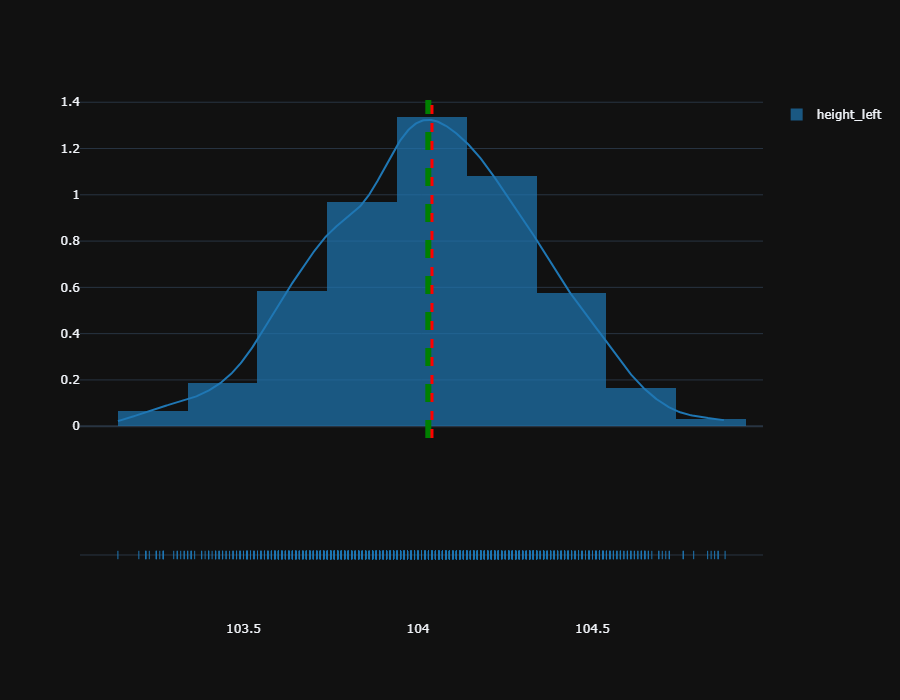

--------------
Caractéristiques de forme
--------------
Coefficient d'asymétrie Skewness :  -0.09202848000665634
Coefficient d'aplatissement Kurtosis :  -0.19861842156870857
--------------
Test de normalité
--------------
Statistiques de test Kolmogorov-Smirnov :  0.021
p-value du test Kolmogorov-Smirnov :  0.9565915053226159
l'échantillon se comporte comme une loi normale  (l'hypothèse H0 est acceptée)
--------------

Height_right


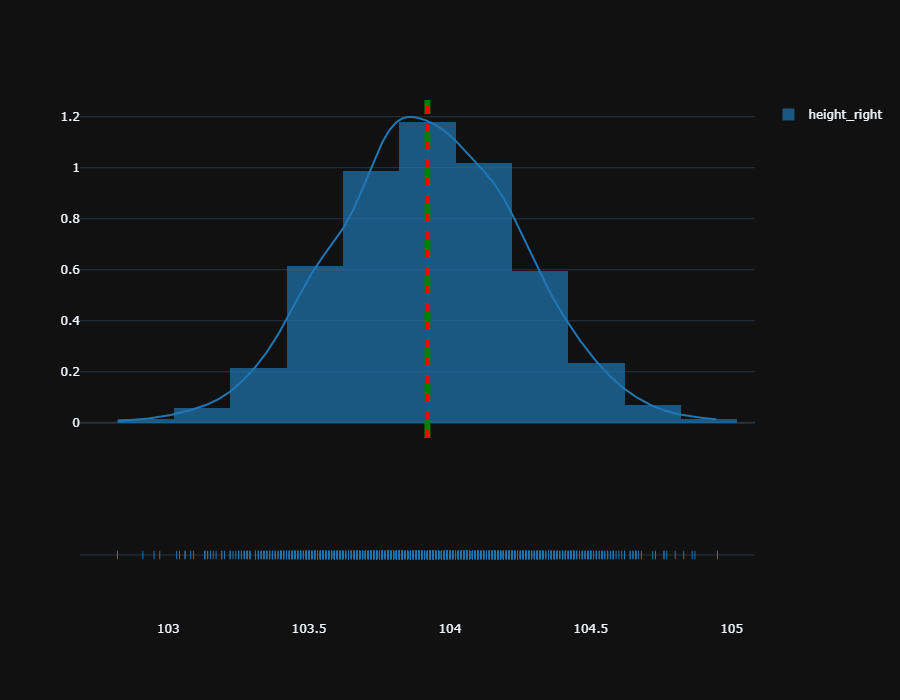

--------------
Caractéristiques de forme
--------------
Coefficient d'asymétrie Skewness :  -0.00032721955634117263
Coefficient d'aplatissement Kurtosis :  -0.03113831813816237
--------------
Test de normalité
--------------
Statistiques de test Kolmogorov-Smirnov :  0.019
p-value du test Kolmogorov-Smirnov :  0.9762254410333435
l'échantillon se comporte comme une loi normale  (l'hypothèse H0 est acceptée)
--------------

Margin_low


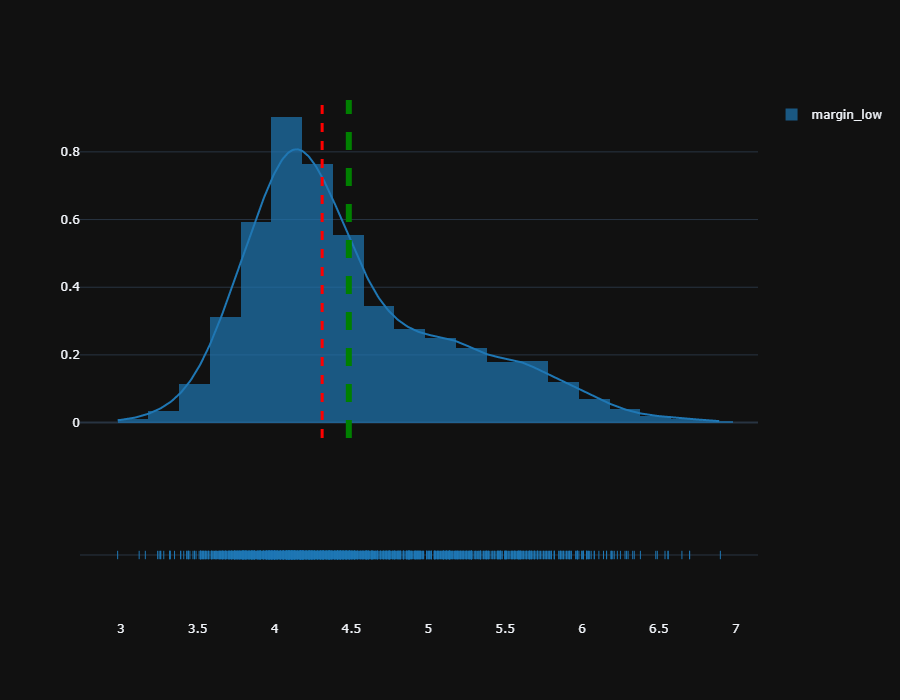

--------------
Caractéristiques de forme
--------------
Coefficient d'asymétrie Skewness :  0.8697706246225988
Coefficient d'aplatissement Kurtosis :  0.24991754017065437
--------------
Test de normalité
--------------
Statistiques de test Kolmogorov-Smirnov :  0.123
p-value du test Kolmogorov-Smirnov :  2.6141308055040894e-08
l'échantillon ne se comporte pas comme une loi normale (l'hypothèse H0 est rejetée)
--------------

Margin_up


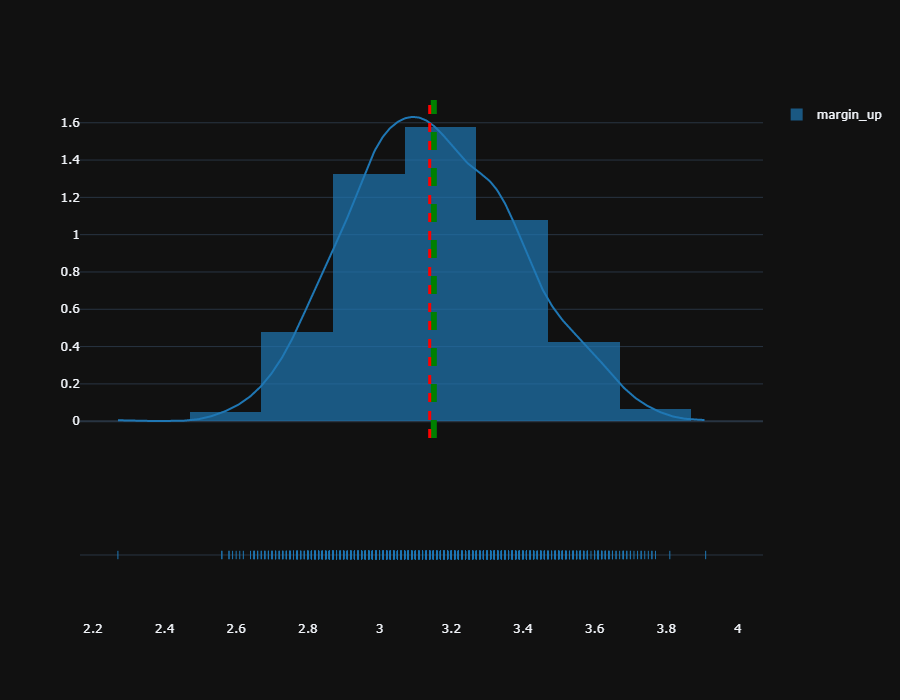

--------------
Caractéristiques de forme
--------------
Coefficient d'asymétrie Skewness :  0.14579184782536259
Coefficient d'aplatissement Kurtosis :  -0.24825698444430389
--------------
Test de normalité
--------------
Statistiques de test Kolmogorov-Smirnov :  0.035
p-value du test Kolmogorov-Smirnov :  0.44726899698668204
l'échantillon se comporte comme une loi normale  (l'hypothèse H0 est acceptée)
--------------

Length


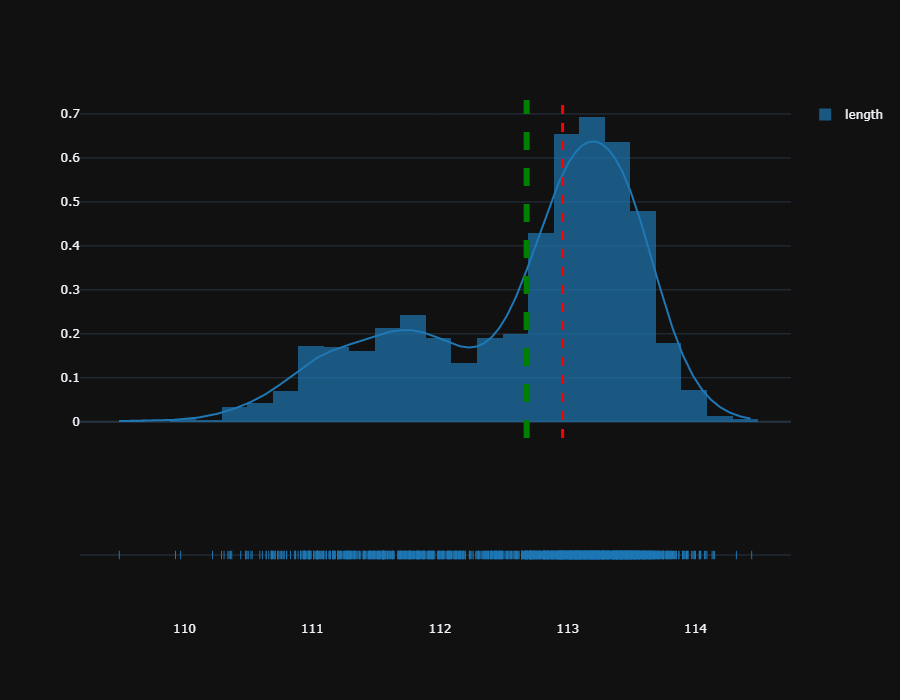

--------------
Caractéristiques de forme
--------------
Coefficient d'asymétrie Skewness :  -0.8151403548537489
Coefficient d'aplatissement Kurtosis :  -0.28338839609225497
--------------
Test de normalité
--------------
Statistiques de test Kolmogorov-Smirnov :  0.163
p-value du test Kolmogorov-Smirnov :  2.637794937088081e-14
l'échantillon ne se comporte pas comme une loi normale (l'hypothèse H0 est rejetée)
--------------



In [23]:
# Colonnes à analyser
colonnes_a_analyser = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# Boucle for pour analyser chaque colonne
for colonne in colonnes_a_analyser:
    analyse_univarie(data_final, colonne, 0.05)

## 5.4 - Matrice de correlation des variables

In [24]:
# Calculez la corrélation entre les colonnes du Dataframe
df_corr = data_final.corr()
df_corr

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.783448,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.110697,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.309209,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.393541,0.307005,-0.401751
margin_low,-0.783448,-0.110697,0.309209,0.393541,1.000000,0.434237,-0.670966
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.434237,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.670966,-0.520575,1.000000


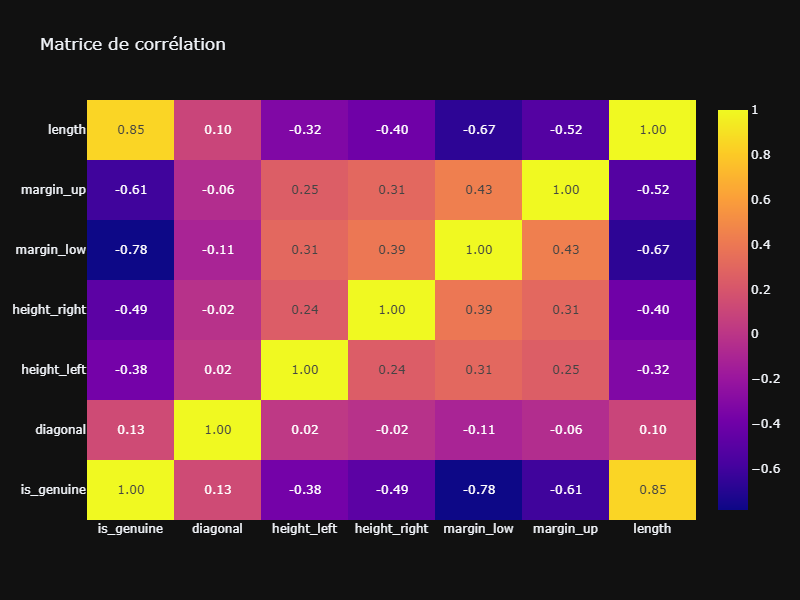

In [25]:
# Afficher la matrice de corrélation
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr),
        text=df_corr.values,
        texttemplate='%{text:.2f}'
    )
)
fig.update_layout(title='Matrice de corrélation',template = 'plotly_dark', height=600, width=800)
fig.write_image("figure/7.png")
display(Image(filename="figure/7.png"))

- une forte corrélation positive entre length et is_genuine
- une forte corrélation négative entre length et margin_low et entre margin_low et is_genuine

In [26]:
# séparation de notre dataframe
# dataframe faux billets
billets_false= data_final.loc[data_final['is_genuine'] ==False]
# dataframe vrai billets
billets_true= data_final.loc[data_final['is_genuine'] ==True]
# Afficher la taille de chaque dataframe
print(billets_true.shape,billets_false.shape)


(1000, 7) (500, 7)


In [27]:
# Générer des statistiques descriptives des vrais billets
billets_true.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000
mean,171.987080,103.949130,103.80865,4.118174,3.05213,113.202430
std,0.300441,0.300231,0.29157,0.317575,0.18634,0.359552
min,171.040000,103.140000,102.82000,2.980000,2.27000,111.760000
25%,171.790000,103.740000,103.61000,3.910000,2.93000,112.950000
50%,171.990000,103.950000,103.81000,4.120000,3.05000,113.205000
75%,172.200000,104.140000,104.00000,4.340000,3.18000,113.460000
max,172.920000,104.860000,104.95000,5.040000,3.74000,114.440000


In [28]:
# Générer des statistiques descriptives des faux billets
billets_false.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,171.901160,104.190340,104.143620,5.214079,3.350160,111.630640
std,0.306861,0.223758,0.270878,0.550363,0.180498,0.615543
min,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,171.690000,104.040000,103.950000,4.840000,3.220000,111.200000
50%,171.910000,104.180000,104.160000,5.180000,3.350000,111.630000
75%,172.092500,104.332500,104.320000,5.590000,3.472500,112.030000
max,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000


**Les dimensions moyennes du vrai billet** :

diagonal : 171.98 mm

height_left : 103.95 mm

height_right : 103.80 mm

margin_low : 4.11 mm

margin_up : 3.05mm

length : 111.20 mm


**Les dimensions moyennes du faux billet** :

diagonal : 171.90 mm

height_left : 103.94 mm

height_right : 103.80 mm

margin_low : 5.21 mm

margin_up : 3.35mm

length : 111.63 mm


## 5.5 - Test ANOVA 

- vérifions si les  différences de moyennes des caractéristiques de nos billets sont significatives

    - Test ANOVA

    - H0: Les moyennes des vrais billets et celles des faux billets sont égales

    - H1: Les moyennes ne sont pas égales.

In [29]:
# Test ANOVA
for i in ['diagonal','height_left','height_right','margin_low','length']:
    test_ANOVA(data_final, 'is_genuine', i, 0.05)

Résultat test ANOVA
------------------
p-value :  2.4668667372399823e-07
FSTAT :  26.874763461800534
------------------
On rejette H0.
Les vrais billets n'ont pas la même moyenne que les faux  billets pour la variable x= diagonal à un niveau de confiance de 95%.
Résultat test ANOVA
------------------
p-value :  1.1269164017506187e-52
FSTAT :  252.55839309812228
------------------
On rejette H0.
Les vrais billets n'ont pas la même moyenne que les faux  billets pour la variable x= height_left à un niveau de confiance de 95%.
Résultat test ANOVA
------------------
p-value :  2.2708556903089336e-89
FSTAT :  460.9742123293048
------------------
On rejette H0.
Les vrais billets n'ont pas la même moyenne que les faux  billets pour la variable x= height_right à un niveau de confiance de 95%.
Résultat test ANOVA
------------------
p-value :  8.919896249657e-312
FSTAT :  2380.7232707657
------------------
On rejette H0.
Les vrais billets n'ont pas la même moyenne que les faux  billets pour la va

Les moyennes des variables explicatives sont statistiquement différentes selon la nature du billet(faux ou vrai)

# 6 - Algorithme de reconnaissance des faux billets

- Le but de ce projet est construire des algorithmes capables de faire des classifications automatiques en vue de partitionner les billets de banque en vrais ou faux billets. 
- Pour ce faire, nous allons construire 2 algorithmes: le premier basé sur le Kmeans et le second sur la régression logistique

## 6.1 - k-means

**Le K-Means** est un algorithme simple d’apprentissage non supervisé utilisé pour résoudre les problèmes de clustering. Il suit une procédure simple consistant à classer un ensemble de données dans un nombre de clusters, défini par la lettre « k« , qui est fixé au préalable.On considère la distance d'un point à la moyenne des points de son cluster ; la fonction à minimiser est la somme des carrés de ces distances. il permet de regrouper des individus ou objets ayant les caractéristiques les plus proches au sein de K groupes. Ces groupes (clusters) sont constitués par itération successive de leur centre de gravité jusqu'à ce que les centres de gravité soient parfaitement équilibrés. C'est ce que l'on appelle la convergence de l'algorithme.

**l'ACP** va nous permettre de reduire notre dimensionnalité en identifiant les liens entre variables et visualiser les résultats du K-means dans un espace à 2 dimensions

Grace à la courbe d'inertie la méthode du coude permet de déterminer la valeur optimal de K, dertiminant ainsi le nombre de cluster au « coude », c’est-à-dire le point où la distorsion/inertie commence à diminuer de manière linéaire.

In [30]:
# on définit la liste d'inertie
inertia_list = [ ]
k_list = range(1, 10) 
for k in k_list : 
    Kmeans = KMeans(n_clusters=k, n_init=10).fit(data_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]]) 
    inertia_list.append(Kmeans.inertia_)
inertia_list

[2307.505186419591,
 972.11536385023,
 861.4151057581425,
 774.7363964171234,
 711.1309410075413,
 666.7514866199086,
 631.2497328751483,
 596.2090475522594,
 572.5402699373637]

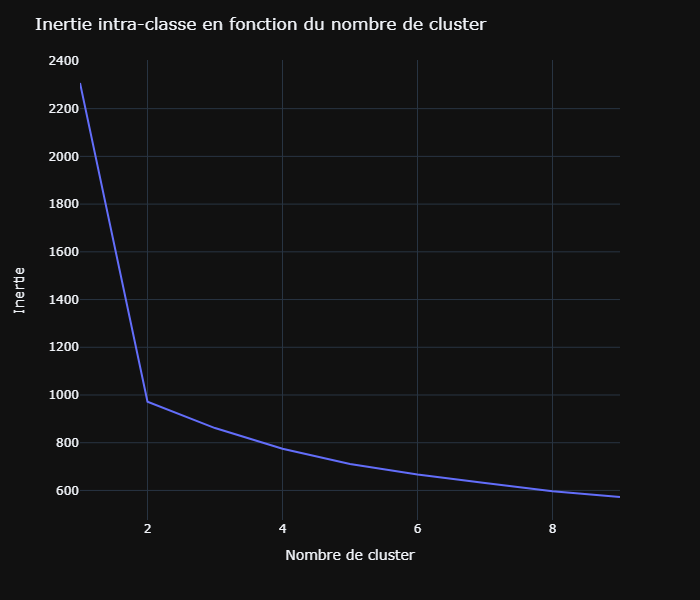

In [31]:
# On affiche le résultat sous forme de graphique
fig = px.line(inertia_list, x= k_list, y= inertia_list)
fig.update_layout(template = 'plotly_dark', height=600, title="Inertie intra-classe en fonction du nombre de cluster")
fig.update_xaxes(title = "Nombre de cluster")
fig.update_yaxes(title = "Inertie")
fig.write_image("figure/8.png")
display(Image(filename="figure/8.png"))

- On a ici l'inertie qui subi une forte chute de 1 à 2 et commence à ralentir au-delà, donc 2 clusters sont suffisants pour notre analyse

In [32]:
# # Clustering par K-means:
Kmeans = KMeans(n_clusters = 2, n_init = 10)
Kmeans.fit(data_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

KMeans(n_clusters=2, n_init=10)

In [33]:
# Prédiction des clusters
y_kmeans =  Kmeans.predict(data_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

# Ajout d'une colonne contenant le cluster attribue:
data_final = data_final.assign(Kmeans = y_kmeans)
map = {0: 'Cluster 1', 1: 'Cluster 2'}
data_final['Kmeans'] = data_final['Kmeans'].map(map)
data_final

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Kmeans
72,True,171.94,103.89,103.45,4.318525,3.25,112.79,Cluster 1
99,True,171.93,104.07,104.18,4.393668,3.14,113.08,Cluster 1
151,True,172.07,103.80,104.38,4.410457,3.02,112.93,Cluster 1
197,True,171.45,103.66,103.80,4.319014,3.62,113.27,Cluster 1
241,True,171.83,104.14,104.06,4.650617,3.02,112.36,Cluster 2
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.420000,3.09,111.28,Cluster 2
1496,False,172.19,104.63,104.44,5.270000,3.37,110.97,Cluster 2
1497,False,171.80,104.01,104.12,5.510000,3.36,111.95,Cluster 2
1498,False,172.06,104.28,104.06,5.170000,3.46,112.25,Cluster 2


In [34]:
# Analyse en composantes principales (ACP) et ajustez le modèle avec (data_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]]).
pca_Kmeans = decomposition.PCA(n_components=3).fit(data_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
pca_Kmeans

PCA(n_components=3)

In [35]:
# Ajustez le modèle avec (data_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]]) et appliquez la réduction de dimensionnalité sur (data_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]]).
acp_Kmeans = PCA(n_components=3).fit_transform(data_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
acp_Kmeans

array([[-0.25196362, -0.11533355, -0.25627121],
       [-0.33134839,  0.1759    ,  0.14243331],
       [-0.2199874 ,  0.10415344,  0.20784396],
       ...,
       [ 1.20402102,  0.44722323, -0.15223417],
       [ 0.80116219,  0.33301245,  0.18894567],
       [ 0.6149491 , -0.20898724, -0.41395364]])

In [36]:
 # calcul des centroides
centroides = Kmeans.cluster_centers_
centroides

array([[171.98699803, 103.95165354, 103.81333661,   4.12414656,
          3.0582185 , 113.19615157],
       [171.89849174, 104.19301653, 104.14485537,   5.23776872,
          3.3472314 , 111.5918595 ]])

In [37]:
# Appliquer la réduction de dimensionnalité au centroides.
centroids_proj = pca_Kmeans.transform(centroides)
centroids_proj

array([[-0.65085045, -0.01353421, -0.00339936],
       [ 1.36624806,  0.02841065,  0.00713585]])

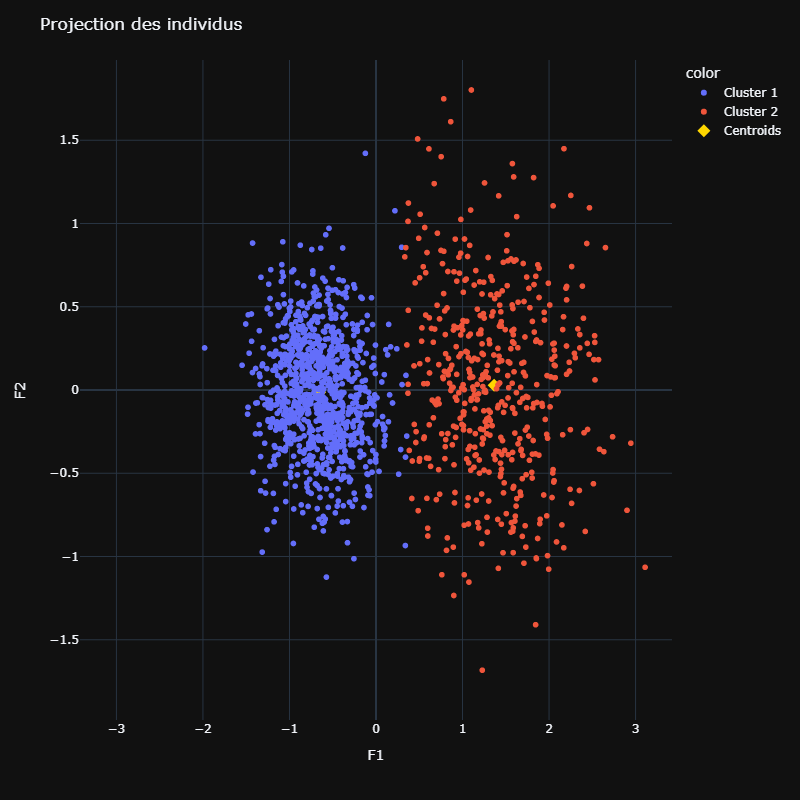

In [38]:
#Graphique de projection des individus
fig = px.scatter(acp_Kmeans, x=acp_Kmeans[:, 0], y=acp_Kmeans[:, 1], 
                 color=data_final['Kmeans'])
x_lim = np.abs(acp_Kmeans[:, 0]).max() * 1.1
y_lim = np.abs(acp_Kmeans[:, 1]).max() * 1.1

fig.add_trace(go.Scatter(x=centroids_proj[:, 0], y=centroids_proj[:, 1],
                         mode='markers', marker=dict(size=10, color='gold', symbol='diamond'),
                         name='Centroids'))

fig.update_layout(template = 'plotly_dark', width=800, height=800, title="Projection des individus",
                  xaxis=dict(title='F1', range=[-x_lim, x_lim]),
                  yaxis=dict(title='F2', range=[-y_lim, y_lim]),
                  hovermode='closest')
fig.write_image("figure/9.png")
display(Image(filename="figure/9.png"))

- Cluster 1 semble être le cluster des vrais billet et le cluster 2 celui des faux billets

### 6.1.1 - Evaluation du modèle Kmeans

**La matrice de confusion** est un résumé des résultats de prédiction pour un problème particulier de classification. Elle compare les données réelles pour une variable cible à celles prédites par un modèle.

**Accuracy**: Performance globale du modèle, représente le taux de prédictions qui correspondent exactement aux étiquettes de classes réelles=Vrai_positif+Vrai_négatif/(Faux_positif+Faux_négatif+Vrai_positif+Vrai_négatif)

**Precision**: la capacité d’un modèle à éviter d’étiqueter des échantillons négatifs comme positifs=Vrai_positif/(Vrai_positif+Faux_positif)

**Recall ou Sensibilité**: Couverture des observations vraiment positives=Vrai_positif/(Vrai_positif+Faux_négatif)

**Spécificité**: Couverture des observations vraiment négatives=Vrai_négatif/(Vrai_négatif+Faux_positif)

In [39]:
#Verification de la classification: Matrice de confusion:
km_matrix = pd.crosstab(data_final['Kmeans'], data_final["is_genuine"])
print(km_matrix)

is_genuine  False  True 
Kmeans                  
Cluster 1      19    997
Cluster 2     481      3


- le cluster 2 représente les faux billets et le cluster 1 celui des vrais billets

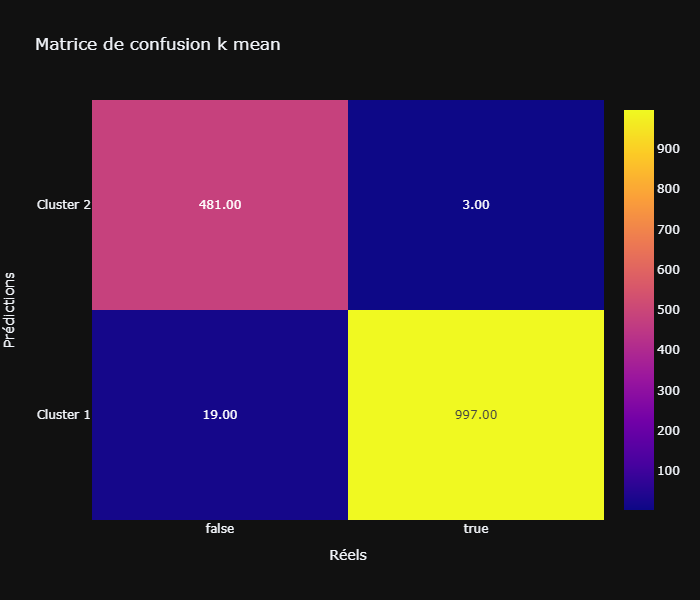

In [40]:
# Graphique du matrice de confusion
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = km_matrix.columns,
        y = km_matrix.index,
        z = np.array(km_matrix),
        text=km_matrix.values,
        texttemplate='%{text:.2f}'
    )
)
fig.update_xaxes(title= 'Réels')
fig.update_yaxes(title= 'Prédictions')
fig.update_layout(template = 'plotly_dark', title= 'Matrice de confusion k mean', height=600)
fig.write_image("figure/10.png")
display(Image(filename="figure/10.png"))

- **Interpretation de la matrice de confusion du k mean**

    - La matrice de confusion nous donne des informations sur la performance de prediction du modèle. 
    - Sur les 500 faux billets, 481 ont été correctement prédit(vrais négatifs) soit un taux de prediction de 96,2% pour les faux billets. 
    - Les vrais positifs ou le nombre de vrais billets qui ont éte correctement classés est de 997 sur les 1000 vrais billets de l'echantillon de test. 
    - Le nombre de faux positif ou les vrais billets de banque qui ont été classifiés comme faux est de 3.
    - Le nombre de faux négatifs ou les faux billets de banque qui ont été classés comme vrai par le modèle est de 19.<br><br>


In [41]:
# A partir du matrice de confusion on peut déduire
accuracy=round(((481+997)/1500)*100,2)
precision=round((997/(997+19))*100,2)
recall=round((997/(3+997))*100,2)
vrai_négatif=round((481/500)*100,2)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("vrai négatif:",vrai_négatif)

Accuracy: 98.53
Precision: 98.13
Recall: 99.7
vrai négatif: 96.2


- **Interpretation des autres métriques:**

    - **L'accuracy est de 98,5%:** c'est à dire que la capacité du modèle à faire de bonnes prédictions sur cet échantillon est de 98.5%;
    - **La précision est de 98,13%:** c'est la part des enregistrements réellement positifs(vrais billets) sur les enregistrements positifs prédits;
    - **Le Recall ou rappel est de 99,7%:** c'est la part des vrais billets correctement predits sur le nombre total de vrais billets. 
    - pour les faux billets il est de 96,2%.<br><br>

- **Les métriques d'évaluation de notre modèle de k means sont satisfaisantes.**

### 6.1.2 - Application du modèle Kmeans aux données test

In [42]:
# Chargement du fichier test
test= pd.read_csv('billets_production.csv')
test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [43]:
X_data = test[["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]]
X_data

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.76,104.01,103.54,5.21,3.30,111.42
1,171.87,104.17,104.13,6.00,3.31,112.09
2,172.00,104.58,104.29,4.99,3.39,111.57
3,172.49,104.55,104.34,4.44,3.03,113.20
4,171.65,103.63,103.56,3.77,3.16,113.33


In [44]:
# Prédiction du cluster le plus proche auquel appartient chaque échantillon de X_data
km_pred=Kmeans.predict(X_data)
# Ajout de la colonne Kleans
data_test= test.assign(Kmeans = km_pred)
map = {0: 'Cluster 1', 1: 'Cluster 2'}
data_test['Kmeans'] =data_test['Kmeans'].map(map)
data_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Kmeans
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,Cluster 2
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,Cluster 2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,Cluster 2
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,Cluster 1
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,Cluster 1


In [45]:
#Résultats de la classification prédictive :
verification = []
for i in data_test['Kmeans']:
    if i == 'Cluster 1' :
        verification.append('Vrai Billet')
    else :
        verification.append('Faux Billet')

data_test['verification'] = verification
data_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Kmeans,verification
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,Cluster 2,Faux Billet
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,Cluster 2,Faux Billet
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,Cluster 2,Faux Billet
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,Cluster 1,Vrai Billet
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,Cluster 1,Vrai Billet


In [46]:
print("\nRésultats d'identification des billets:\n")
for i , v in zip(data_test["id"], data_test['verification']):
    print("Le billet", str(i) ,"est un", v)
       


Résultats d'identification des billets:

Le billet A_1 est un Faux Billet
Le billet A_2 est un Faux Billet
Le billet A_3 est un Faux Billet
Le billet A_4 est un Vrai Billet
Le billet A_5 est un Vrai Billet


- On a les 3 premiers billets qui sont des faux billets et les 2 derniers sont vrais

### 6.1.3 - Sauvegarde du modèle de Kmeans

In [47]:
# Sauvegarde du modele Kmeans
dump(Kmeans, 'kmeans_model.joblib')

['kmeans_model.joblib']

## 6.2 - Régression logistique

Le principe du modèle de la régression logistique est d'expliquer la survenance ou non d'un événement dans notre cas faux billet ou vrai billet  par le niveau de variables explicatives quantitatives (notées X). le but est de construire un algorithme de regression logistique qui permet de classifier les billets en vrai ou faux. Nous allons segmenter nos données en données d'entrainement et données de test puis nous évaluerons notre modèle sur les données de test.
Pour analyser une variable binomial (dont les valeurs seraient VRAI/FAUX, 0/1, ou encore OUI/NON) en fonction d'une variable explicative quantitative (et potentiellement qualitatives), on peut utiliser une régression logistique. La régression logistique est une méthode de classification supervisée.

Nous allons d'abord implementer la regression logistiques avec la librairie statmodel qui nous permet d'avoir un résumé des performance de la regression ainsi que les principaux paramètres.

### 6.2.1 - Régression Logistique avec la librairie Statsmodels

In [48]:
# variable dépendante ou variable de réponse endog
y_billets = data_final["is_genuine"]
print(y_billets.value_counts())

is_genuine
True     1000
False     500
Name: count, dtype: int64


In [49]:
# Fichier de variables explicatives ou la conception exogène
x_billets = data_final[['diagonal', 'height_left', 'height_right','margin_low','margin_up','length']]
# l'interception n'est incluse c'est pour cette raison on ajoute une constante au model
x_billets = sm.tools.add_constant(x_billets)
x_billets

,const,diagonal,height_left,height_right,margin_low,margin_up,length
72,1.0,171.94,103.89,103.45,4.318525,3.25,112.79
99,1.0,171.93,104.07,104.18,4.393668,3.14,113.08
151,1.0,172.07,103.80,104.38,4.410457,3.02,112.93
197,1.0,171.45,103.66,103.80,4.319014,3.62,113.27
241,1.0,171.83,104.14,104.06,4.650617,3.02,112.36
...,...,...,...,...,...,...,...
1495,1.0,171.75,104.38,104.17,4.420000,3.09,111.28
1496,1.0,172.19,104.63,104.44,5.270000,3.37,110.97
1497,1.0,171.80,104.01,104.12,5.510000,3.36,111.95
1498,1.0,172.06,104.28,104.06,5.170000,3.46,112.25


In [50]:
# Modele de Regression logistique:
reg_logistic = Logit(endog=y_billets,exog=x_billets)

# Ajuster le modele en utilisant le maximum de vraisemblance
result_log = reg_logistic.fit()

# Resume des resultats:
print(result_log.summary())

Optimization terminated successfully.
         Current function value: 0.028228
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1493
Method:                           MLE   Df Model:                            6
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.9557
Time:                        17:14:51   Log-Likelihood:                -42.342
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -204.5582    241.768     -0.846      0.398    -678.415     269.299
diagonal         0.068

la p_value est <0.05 donc le modèle est significatif dans sa globalité. il y a des variables qui ne sont pas significatives dans le modèle(la diagonale, heigth_left), mais avec le R2 ajusté très elevé, nous pouvons les garder dans le modèle 

**Modèle excluant les variables non significatives**

In [51]:
# fichiers de variables explicatives ou la conception exogène
x_billets_2 = data_final[['height_right','margin_low','margin_up','length']]
# Modele de Regression logistique:
reg_logistic_2 = Logit(endog=y_billets,exog=x_billets_2)

# Ajuster le modele en utilisant le maximum de vraisemblance
result_log2 = reg_logistic_2.fit()

# Resume des resultats:
print(result_log2 .summary())

Optimization terminated successfully.
         Current function value: 0.030986
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1496
Method:                           MLE   Df Model:                            3
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.9513
Time:                        17:14:51   Log-Likelihood:                -46.478
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
height_right    -5.0148      0.680     -7.376      0.000      -6.347      -3.682
margin_low      -5.868

**En excluant les deux variables 'diagonal', 'height_left', les statistiques et paramètres du modèle ne s'améliorent pas significativement. On va les garder pour la suite**

### 6.2.2 - Régression Logistique avec la librairie Sklearn

#### a - Séparation du datasframe en données d'entrainement et données de test

In [52]:
# Séparation du datasframe en données d'entrainement et données de test
x_train, x_test, y_train, y_test = train_test_split(data_final[['diagonal','height_left','height_right','margin_low','margin_up','length']], data_final["is_genuine"], test_size=0.20, 
                                                    random_state=1) 

In [53]:
x_train

,diagonal,height_left,height_right,margin_low,margin_up,length
36,171.80,104.28,104.06,4.47,3.29,113.93
680,172.03,103.87,103.40,4.29,3.01,113.09
1302,172.08,103.98,104.23,4.99,3.31,112.19
532,171.73,103.77,103.95,4.25,3.08,112.75
767,172.62,104.00,104.03,4.31,3.29,113.10
...,...,...,...,...,...,...
694,171.49,103.77,103.60,4.01,3.09,112.95
892,172.63,104.13,104.17,3.77,3.45,113.34
1089,171.13,104.13,104.26,3.86,3.69,111.52
202,172.11,103.98,104.02,4.17,3.24,112.96


In [54]:
y_train

36       True
680      True
1302    False
532      True
767      True
        ...  
694      True
892      True
1089    False
202      True
1053    False
Name: is_genuine, Length: 1200, dtype: bool

In [55]:
x_test

,diagonal,height_left,height_right,margin_low,margin_up,length
54,172.02,103.58,103.80,3.950000,3.46,112.40
38,172.00,103.76,104.27,4.420000,3.29,112.67
1259,172.20,104.45,104.02,4.810000,3.58,111.20
300,171.54,104.27,104.01,4.630000,3.05,113.09
1346,171.94,104.37,104.14,5.370000,3.46,111.94
...,...,...,...,...,...,...
1087,171.91,104.28,103.86,5.480000,3.37,113.13
1199,172.03,104.32,104.87,4.490000,3.77,111.04
1124,171.88,103.92,104.27,6.700000,3.11,110.93
505,172.01,103.97,104.05,4.058764,2.98,113.65


In [56]:
y_test

54       True
38       True
1259    False
300      True
1346    False
        ...  
1087    False
1199    False
1124    False
505      True
379      True
Name: is_genuine, Length: 300, dtype: bool

In [57]:
# Application de la régression logistique et ajuster le modele en fonction des données d"entrainement 
reg_logist = LogisticRegression().fit(x_train, y_train)
# Prédire les étiquettes de classe pour les échantillons dans  x_test
y_pred = reg_logist.predict(x_test) 
y_pred 

array([ True,  True, False,  True, False,  True, False, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False, False, False,  True,  True, False, False,
        True, False,  True, False,  True, False, False,  True, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False, False, False,  True,
        True, False,  True, False,  True,  True, False, False,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True, False,
        True,  True,

#### b - Evaluation du modèle de regression logistique

**La matrice de confusion** est un résumé des résultats de prédiction pour un problème particulier de classification. Elle compare les données réelles pour une variable cible à celles prédites par un modèle.

**Accuracy**: Performance globale du modèle, représente le taux de prédictions qui correspondent exactement aux étiquettes de classes réelles = Vrai_positif+Vrai_négatif/(Faux_positif+Faux_négatif+Vrai_positif+Vrai_négatif)

**Precision**: la capacité d’un modèle à éviter d’étiqueter des échantillons négatifs comme positifs=Vrai_positif/(Vrai_positif+Faux_positif)

**Recall ou Sensibilité**: Couverture des observations vraiment positives=Vrai_positif/(Vrai_positif+Faux_négatif)

**F_score**: également appelé score F équilibré ou F-mesure. Le score F1 peut être interprété comme une moyenne harmonique de la précision (taux de prédictions positives correctes) et du rappel(taux de positifs correctement prédits), où un score F1 atteint sa meilleure valeur à 1 et son pire score à 0. La contribution relative de la précision et du rappel au score F1 est égale. La formule du score F1 est la suivante : F1 = 2 * (precision * recall) / (precision + recall)

**Courbe ROC et AUC**: La courbe ROC permet de décrire la performance d’un modèle à travers deux indicateurs : la sensitivité et la specificité. L’aire sous cette courbe, nommée AUC ROC, mesure de façon globale la performance d’un modèle de classification.

Le terme AUC signifie  Area Under the Curve, aire sous la courbe en français. La métrique AUC ROC consiste donc à calculer l’aire sous la courbe ROC.

Graphiquement, on représente souvent la mesure ROC sous la forme d'une courbe qui donne le taux de vrais positifs en fonction du taux de faux positifs.

Un score AUC (Area Under Curve) de 1 représente un classificateur parfait, un score de 0.5 représente un classificateur inutile.

In [58]:
# Matrice de confusion
conf_matrix= confusion_matrix(y_test,  y_pred)
conf_matrix

array([[ 97,   1],
       [  2, 200]], dtype=int64)

In [59]:
# Mettre la matrice de confusion sous forme de dataframe
conf_matrix= pd.DataFrame(conf_matrix)
conf_matrix

,0,1
0,97,1
1,2,200


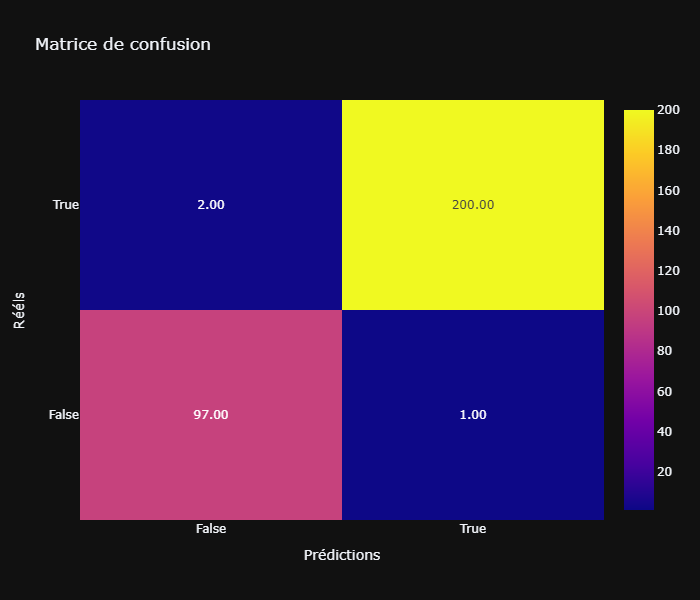

In [60]:
# Graphique de la matrice de confusion
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = conf_matrix.index,
        y = conf_matrix.columns,
        z = np.array(conf_matrix),
        text=conf_matrix.values,
        texttemplate='%{text:.2f}'
    )
)
fig.update_xaxes(title= 'Prédictions',ticktext=["False", "True"], tickvals=[0, 1])
fig.update_yaxes(title= 'Rééls',ticktext=["False", "True"], tickvals=[0, 1])
fig.update_layout(template = 'plotly_dark', title= 'Matrice de confusion',height=600)
fig.write_image("figure/11.png")
display(Image(filename="figure/11.png"))

- **Interpretation de la matrice de confusion**

    - La matrice de confusion nous donne des informations sur la performance de prediction du modèle.
    - Sur les 98 faux billets, 97 ont été correctement prédit(vrais négatifs) soit un taux de prediction de 95,83%.
    - Les vrais positifs ou le nombre de vrais billets qui ont éte correctement classés est de 200 sur les 202 vrais billets de l'echantillon de test.
    - Le nombre de faux positifs ou le vrais billets de banque qui ont été classifiés comme faux est de 2
    - Le nombre de faux négatifs ou les faux billets de banque qui ont été classés comme vrai par le modèle est de 1.

In [61]:
# métriques qui nous permettront de mieux analyser les performances de notre modèle de régression logistique 
print("Accuracy: ", accuracy_score(y_test, y_pred)*100, '%')
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("F1_score:",f1_score(y_test, y_pred))
print("\n")
print("Rapport de classification")
print(classification_report(y_test, y_pred, digits=6))

Accuracy:  99.0 %
Precision: 0.9950248756218906
Recall: 0.9900990099009901
F1_score: 0.9925558312655087


Rapport de classification
              precision    recall  f1-score   support

       False   0.979798  0.989796  0.984772        98
        True   0.995025  0.990099  0.992556       202

    accuracy                       0.990000       300
   macro avg   0.987411  0.989947  0.988664       300
weighted avg   0.990051  0.990000  0.990013       300



- **Interpretation des autres métriques**:

    - **L'accuracy est de 99 %** c'est à dire que la capacité du modèle à faire de bonnes prédictions sur cet échantillon est de 99 %.
    - **La précision est de 99,5 %** c'est  la part des enregistrements réellement positifs (vrais billets) sur les enregistrements positifs prédits.
    - **Le Recall ou rappel est de 99 %**: c'est la part des vrais billets correctement predits sur le nombre total de vrais billet ou Couverture des observations vraiment positives.
    - **F1_score est de 99,25**: ca veut dire qu'il accorde autant d’importance à la precision qu’au recall.
- **Les métriques d'évaluation de notre modèle de regression logistique sont satisfaisantes.**

**Courbe ROC**

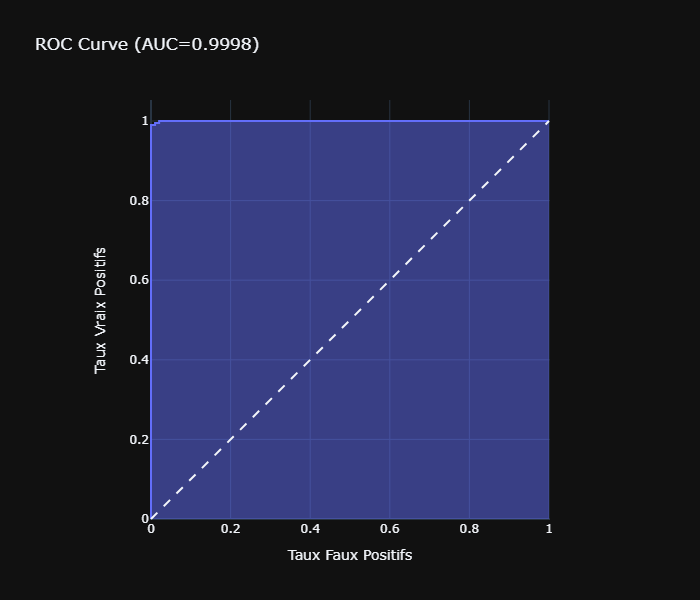

In [62]:
# estimations de probabilité
y_pred_proba = reg_logist.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Courbe ROC
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={metrics.roc_auc_score(y_test, y_pred_proba):.4f})',
    labels=dict(x='Taux Faux Positifs', y='Taux Vraix Positifs'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_layout(template = 'plotly_dark', height=600)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.write_image("figure/12.png")
display(Image(filename="figure/12.png"))

- La courbe de ROC ayant un marqueur à 0,999 soit 99,9% des individus on pu être séparés et classifiés.

#### c - Application du modèle aux données test

In [63]:
test= pd.read_csv('billets_production.csv')
test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [64]:
X_data = test[["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]]
X_data

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.76,104.01,103.54,5.21,3.30,111.42
1,171.87,104.17,104.13,6.00,3.31,112.09
2,172.00,104.58,104.29,4.99,3.39,111.57
3,172.49,104.55,104.34,4.44,3.03,113.20
4,171.65,103.63,103.56,3.77,3.16,113.33


In [65]:
# Prédire les etiquettes de la classe pour les échantillons de X_data
predict = reg_logist.predict(X_data)
# Estimation de probabilité
proba = reg_logist.predict_proba(X_data)[:, 1].round(3)
# Ajout des colonnes probabilité et prédiction
data_test= test.assign(Prédiction = predict, Probability =proba)
data_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Prédiction,Probability
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,0.005
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,0.001
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,0.001
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,0.906
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,1.000


- Dataframe final avec résultats des classifications:
    - Pour chaque billet, l'algorithme de classification donnera la probabilité que le billet soit vrai. 
    - Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux.

In [66]:
#Résultats de la classification prédictive :
verification = []
for i in data_test['Probability']:
    if i >= 0.5 :
        verification.append('Vrai Billet')
    else :
        verification.append('Faux Billet')

data_test['verification'] = verification
data_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Prédiction,Probability,verification
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,0.005,Faux Billet
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,0.001,Faux Billet
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,0.001,Faux Billet
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,0.906,Vrai Billet
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,1.000,Vrai Billet


In [67]:
for k, v in zip(data_test["id"],data_test['verification'] ):
    print("Le billet "+ str(k) + " est un", v)

Le billet A_1 est un Faux Billet
Le billet A_2 est un Faux Billet
Le billet A_3 est un Faux Billet
Le billet A_4 est un Vrai Billet
Le billet A_5 est un Vrai Billet


- On a les memes résultats sur cet échantillon qu'avec le Kmeans

#### d - Sauvegarde du modele de régression logistique

In [68]:
# Sauvegarde de la regression logistique
dump(reg_logist, 'logit_model.joblib')

['logit_model.joblib']

# 7 - Algorithme de detection des faux billets

## 7.1 - Algorithme de détection des faux billets avec le modèle de régression logistique

In [69]:
# chargement du fichier à évaluer
billet = pd.read_csv("billets_test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'billets_test.csv'

In [ ]:
# variables explicatives
x_data = billet[['diagonal','height_left','height_right','margin_low','margin_up','length']]
#chargement du modèle de régression logistique                                                                
model_reg_logist = load('logit_model.joblib')
# Prédire les etiquettes de la classe pour les échantillons de X_data
billet["prediction"] = model_reg_logist.predict(x_data)
# Estimation de probabilité
billet["probability"] = model_reg_logist.predict_proba(x_data)[:, 1].round(3)
verification = []
for i in billet['probability']:
    if i >= 0.5 :
        verification.append('Vrai Billet')
    else :
        verification.append('Faux Billet')

billet['verification'] = verification
billet

In [ ]:
# Affichage des resultats:
print("\nRésultats d'identification des billets:\n")
for k, v in zip(billet["id"], billet['verification']):
    print("Le billet", str(k) ,"est un", v)

## 7.2 - Algorithme de détection des faux billets avec le modèle Kmeans 

In [ ]:
#Données de test ou fichier à évaluer
billets = pd.read_csv("billets_test.csv")
X_data = billets[['diagonal','height_left','height_right','margin_low','margin_up','length']]

model_kmeans = load('kmeans_model.joblib')
billets['Kmeans']= model_kmeans.predict(X_data)
map = {0: 'Cluster 1', 1: 'Cluster 2'}
billets['Kmeans'] = billets['Kmeans'].map(map)
verification = []
for i in billets['Kmeans']:
    if i == 'Cluster 1' :
        verification.append('Vrai Billet')
    else :
        verification.append('Faux Billet')

billet['verification'] = verification

billet

In [ ]:
# Affichage des resultats:
print("\nRésultats d'identification des billets:\n")
for k, v in zip(billet["id"], billet['verification']):
    print("Le billet", str(k) ,"est un", v)